In [1]:
import pandas as pd



# Diapers

In [2]:
data_df= pd.read_csv('diapers.csv')
data_df

,Unnamed: 0,Listing,Actions,Avg Sold Price,Avg Shipping,Total Sold,Item_Sale,Bids,Date Last Sold
0,0,", preview full size imagePampers Swaddlers Act...",EditSell SimilarExclude listing,$34.05Fixed price,$0.00100% Free shipping,203,"$6,912.46",–,"Mar 19, 2024"
1,1,", preview full size imageDiapers Size 6 124 Co...",EditSell SimilarExclude listing,$34.47Fixed price,$0.00100% Free shipping,2,$68.94,–,"Mar 19, 2024"
2,2,", preview full size imageSize 5: 27lbs and up,...",EditSell SimilarExclude listing,$57.99Fixed price,$0.00100% Free shipping,21,"$1,217.79",–,"Mar 19, 2024"
3,3,", preview full size imageHuggies Size 4 Diaper...",EditSell SimilarExclude listing,$32.40Fixed price,$0.00100% Free shipping,2,$64.80,–,"Mar 19, 2024"
4,4,", preview full size imagePampers Swaddlers Dia...",EditSell SimilarExclude listing,$19.99Fixed price,$0.00100% Free shipping,1,$19.99,–,"Mar 19, 2024"
...,...,...,...,...,...,...,...,...,...
5695,45,", preview full size imageNIB Parent's Choice S...",EditExclude listing,$2.37Fixed price,$7.700% Free shipping,1,$2.37,–,"Jan 4, 2022"
5696,46,", preview full size imagePampers Baby Dry 37 c...",EditExclude listing,$15.00Fixed price,$0.00100% Free shipping,1,$15.00,–,"Jan 4, 2022"
5697,47,", preview full size imagePampers Baby Dry Disp...",EditExclude listing,$32.99Fixed price,$0.00100% Free shipping,1,$32.99,–,"Jan 4, 2022"
5698,48,", preview full size imagePampers Baby-Dry Extr...",EditExclude listing,$47.38Fixed price,$0.00100% Free shipping,17,$805.39,–,"Jan 3, 2022"


In [3]:


# Function to extract and format the first part of the string
def extract_and_format(value):
    parts = value.split('%')[0].split('$')[1]
    first_part = parts.strip()
    formatted_value = '{:.2f}'.format(float(first_part[1:]))
    return formatted_value


In [4]:
# Remove commas from all values in the DataFrame
data_df = data_df.replace(',', '', regex=True)
# 
data_df['Avg_Sold_Price'] = data_df['Avg Sold Price'].apply(lambda x: x.split('$')[1].split('F')[0].split('A')[0]).astype(float)

# 
data_df['Total_Sales'] = data_df['Item_Sale'].apply(lambda x: x.split('$')[1]).astype(float)

data_df['Total_Sold'] = data_df['Total Sold'].astype(float)

# Convert string to datetime
data_df['Date'] = pd.to_datetime(data_df['Date Last Sold'])

# Apply the function to the column
data_df['Shipping'] = data_df['Avg Shipping'].apply(lambda x: extract_and_format(x)).astype(float)

data_df.head()

,Unnamed: 0,Listing,Actions,Avg Sold Price,Avg Shipping,Total Sold,Item_Sale,Bids,Date Last Sold,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping
0,0,preview full size imagePampers Swaddlers Acti...,EditSell SimilarExclude listing,$34.05Fixed price,$0.00100% Free shipping,203,$6912.46,–,Mar 19 2024,34.05,6912.46,203.0,2024-03-19,0.0
1,1,preview full size imageDiapers Size 6 124 Cou...,EditSell SimilarExclude listing,$34.47Fixed price,$0.00100% Free shipping,2,$68.94,–,Mar 19 2024,34.47,68.94,2.0,2024-03-19,0.0
2,2,preview full size imageSize 5: 27lbs and up 1...,EditSell SimilarExclude listing,$57.99Fixed price,$0.00100% Free shipping,21,$1217.79,–,Mar 19 2024,57.99,1217.79,21.0,2024-03-19,0.0
3,3,preview full size imageHuggies Size 4 Diapers...,EditSell SimilarExclude listing,$32.40Fixed price,$0.00100% Free shipping,2,$64.80,–,Mar 19 2024,32.40,64.80,2.0,2024-03-19,0.0
4,4,preview full size imagePampers Swaddlers Diap...,EditSell SimilarExclude listing,$19.99Fixed price,$0.00100% Free shipping,1,$19.99,–,Mar 19 2024,19.99,19.99,1.0,2024-03-19,0.0


In [5]:
data_df.drop(columns=['Unnamed: 0', 'Actions', 'Avg Sold Price', 'Bids', 'Date Last Sold', 'Avg Shipping', 'Item_Sale', 'Total Sold'], inplace=True)
data_df.head()

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping
0,preview full size imagePampers Swaddlers Acti...,34.05,6912.46,203.0,2024-03-19,0.0
1,preview full size imageDiapers Size 6 124 Cou...,34.47,68.94,2.0,2024-03-19,0.0
2,preview full size imageSize 5: 27lbs and up 1...,57.99,1217.79,21.0,2024-03-19,0.0
3,preview full size imageHuggies Size 4 Diapers...,32.40,64.80,2.0,2024-03-19,0.0
4,preview full size imagePampers Swaddlers Diap...,19.99,19.99,1.0,2024-03-19,0.0


In [6]:
data_df['Listing'] = data_df['Listing'].apply(lambda x: x.split('image')[-1])

In [7]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Download NLTK resources (only need to do this once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to extract keywords
def extract_keywords(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    keywords = [word for word, pos in tagged_tokens if pos in ['NN', 'NNS', 'NNP', 'JJ']]
    return keywords


[nltk_data] Downloading package punkt to /Users/evanbruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/evanbruno/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
# Apply the function to both listing titles and descriptions
data_df['Title_Keywords'] = data_df['Listing'].apply(extract_keywords)
data_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
0,Pampers Swaddlers Active Baby Diapers Enormous...,34.05,6912.46,203.0,2024-03-19,0.0,"[Pampers, Swaddlers, Active, Baby, Diapers, En..."
1,Diapers Size 6 124 CountDiapers Size 6 124 Count,34.47,68.94,2.0,2024-03-19,0.0,"[Diapers, Size, Count]"
2,Size 5: 27lbs and up 168 Count Kirkland Signat...,57.99,1217.79,21.0,2024-03-19,0.0,"[Size, Count, Kirkland, Signature, Diapers, Co..."
3,Huggies Size 4 Diapers Little Movers Baby Diap...,32.40,64.80,2.0,2024-03-19,0.0,"[Huggies, Diapers, Little, Movers, Baby, Diape..."
4,Pampers Swaddlers Diapers Size 1 96 CountPampe...,19.99,19.99,1.0,2024-03-19,0.0,"[Pampers, Swaddlers, Diapers, Size, Count]"
...,...,...,...,...,...,...,...
5695,NIB Parent's Choice Size One DiapersNIB Parent...,2.37,2.37,1.0,2022-01-04,0.7,"[NIB, Parent, Choice, Size, DiapersNIB, Parent..."
5696,Pampers Baby Dry 37 ct Diapers - White - Size...,15.00,15.00,1.0,2022-01-04,0.0,"[Pampers, Baby, Dry, ct, Diapers, White, Size,..."
5697,Pampers Baby Dry Disposable Diapers NEWBORN SI...,32.99,32.99,1.0,2022-01-04,0.0,"[Pampers, Baby, Dry, Disposable, Diapers, NEWB..."
5698,Pampers Baby-Dry Extra Protection Diapers - Ne...,47.38,805.39,17.0,2022-01-03,0.0,"[Pampers, Baby-Dry, Extra, Protection, Diapers..."


# Trends

In [41]:
data_df['Month_Year'] = data_df['Date'].dt.strftime('%B %Y')

avg_sold = data_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']

total_sold = data_df.groupby(by='Month_Year').sum()['Total_Sold']

total_sales = data_df.groupby(by='Month_Year').sum()['Total_Sales']

count = data_df.groupby(by='Month_Year').count()['Total_Sales']

trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales, 'Count': count}

trend_df = pd.DataFrame.from_dict(trend_dict)

trend_df['Date'] = pd.to_datetime(trend_df.index)
trend_df = trend_df.sort_values(by='Date')

trend_df

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_5898/2835948711.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_sold = data_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_5898/2835948711.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_sold = data_df.groupby(by='Month_Year').sum()['Total_Sold']
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_5898/2835948711.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. 

,Avg_Sold,Total_Sold,Total_Sales,Count,Date
Month_Year,,,,,
January 2022,35.471185,861.0,24128.11,135,2022-01-01
February 2022,39.905926,573.0,23204.90,108,2022-02-01
March 2022,35.460569,736.0,27549.95,123,2022-03-01
April 2022,33.366953,453.0,15117.74,128,2022-04-01
May 2022,37.724539,492.0,19346.87,141,2022-05-01
June 2022,36.301958,762.0,29569.97,143,2022-06-01
July 2022,37.291149,890.0,37117.27,148,2022-07-01
August 2022,36.206444,923.0,34824.50,135,2022-08-01
September 2022,33.795455,1013.0,31031.48,154,2022-09-01


In [42]:
from matplotlib import pyplot as plt

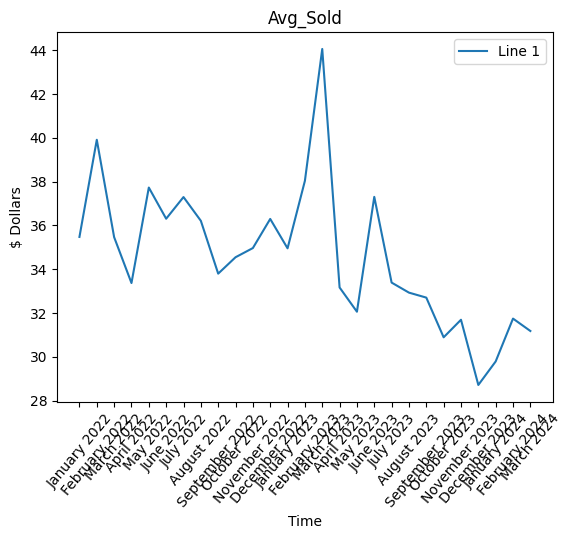

In [43]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Avg_Sold')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

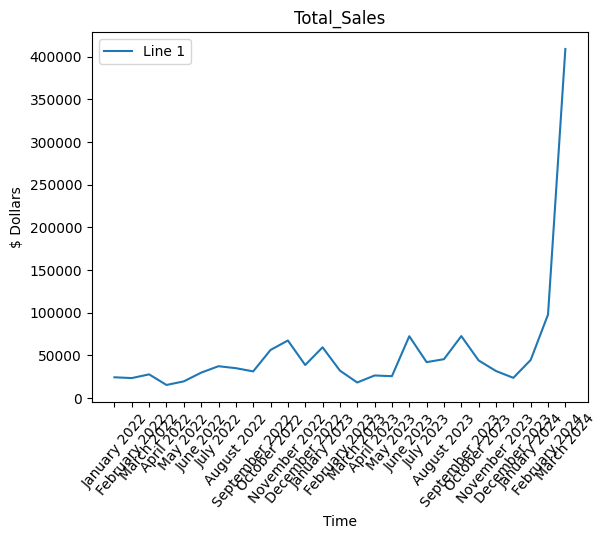

In [44]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Total_Sales'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Total_Sales')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

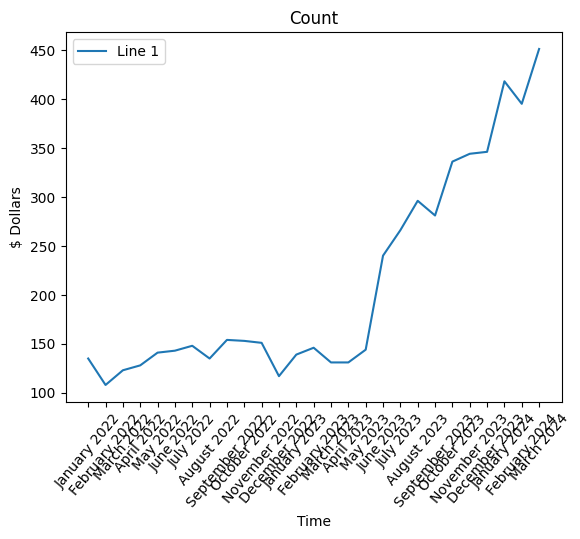

In [45]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Count'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Count')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [51]:
trend_df['Date'] = trend_df['Date'].astype(str)
trend_df['Change_Total_Sold'] = (trend_df['Total_Sold'] - trend_df['Total_Sold'].shift(1)) / trend_df['Total_Sold']
trend_df['Change_Avg_Sold'] = (trend_df['Avg_Sold'] - trend_df['Avg_Sold'].shift(1)) / trend_df['Avg_Sold']
trend_df['Change_Total_Sales'] = (trend_df['Total_Sales'] - trend_df['Total_Sales'].shift(1)) / trend_df['Total_Sales']
trend_df['Change_Count'] = (trend_df['Count'] - trend_df['Count'].shift(1)) / trend_df['Count']


In [52]:
trend_df

,Avg_Sold,Total_Sold,Total_Sales,Count,Date,Change_Total_Sold,Change_Avg_Sold,Change_Total_Sales,Change_Count
Month_Year,,,,,,,,,
January 2022,35.471185,861.0,24128.11,135,2022-01-01,NaN,NaN,NaN,NaN
February 2022,39.905926,573.0,23204.90,108,2022-02-01,-0.502618,0.111130,-0.039785,-0.250000
March 2022,35.460569,736.0,27549.95,123,2022-03-01,0.221467,-0.125361,0.157715,0.121951
April 2022,33.366953,453.0,15117.74,128,2022-04-01,-0.624724,-0.062745,-0.822359,0.039062
May 2022,37.724539,492.0,19346.87,141,2022-05-01,0.079268,0.115511,0.218595,0.092199
June 2022,36.301958,762.0,29569.97,143,2022-06-01,0.354331,-0.039187,0.345726,0.013986
July 2022,37.291149,890.0,37117.27,148,2022-07-01,0.143820,0.026526,0.203337,0.033784
August 2022,36.206444,923.0,34824.50,135,2022-08-01,0.035753,-0.029959,-0.065838,-0.096296
September 2022,33.795455,1013.0,31031.48,154,2022-09-01,0.088845,-0.071341,-0.122231,0.123377


In [53]:
econ_df = pd.read_csv('Economic_Data.csv')
econ_df

,Date,Unemployment_Rate,Change_Unemployment_Rate,10_year_interest,Change_10_year_interest,Real_Personal_Consumption_Expenditure,Change_Real_Personal_Consumption_Expenditure,Median_CPI,Change_Median_CPI,Personal_Consumption_Expenditure,Change_Personal_Consumption_Expenditure,Money_Supply,Change_Money_Supply,Sticky_Price_CPI,Change_Sticky_Price_CPI
0,2021-02-01,6.2,-0.032258,-0.230824,-0.018167,14037.8,-0.010180,2.791872,0.580474,14948.2,-0.006630,7426.8,0.008267,1.405123,0.003241
1,2021-03-01,6.1,-0.016393,0.012507,19.455761,14629.3,0.040433,2.452308,-0.138467,15657.6,0.045307,7481.2,0.007272,1.592366,0.117588
2,2021-04-01,6.1,0.000000,0.118047,0.894052,14730.7,0.006884,2.906269,0.156201,15854.1,0.012394,7551.4,0.009296,2.209393,0.279274
3,2021-05-01,5.8,-0.051724,0.036948,-2.194984,14689.6,-0.002798,3.255716,0.107333,15890.0,0.002259,7617.8,0.008716,2.562825,0.137907
4,2021-06-01,5.9,0.016949,-0.005665,7.522252,14816.4,0.008558,3.750860,0.132008,16108.5,0.013564,7571.8,-0.006075,2.558145,-0.001829
5,2021-07-01,5.4,-0.092593,0.035041,1.161663,14784.0,-0.002192,3.030015,-0.237902,16150.8,0.002619,7580.6,0.001161,2.323597,-0.100942
6,2021-08-01,5.1,-0.058824,-0.261019,1.134247,14863.0,0.005315,4.052921,0.252387,16305.6,0.009494,7636.0,0.007255,2.332419,0.003782
7,2021-09-01,4.7,-0.085106,-0.194731,-0.340408,14899.4,0.002443,4.930690,0.178022,16398.9,0.005689,7652.7,0.002182,2.610662,0.106579
8,2021-10-01,4.5,-0.044444,0.087901,3.215340,14997.3,0.006528,6.581623,0.250840,16613.8,0.012935,7647.4,-0.000693,3.007604,0.131979
9,2021-11-01,4.1,-0.097561,0.163998,0.464011,15019.2,0.001458,5.921978,-0.111389,16741.6,0.007634,7645.1,-0.000301,3.184384,0.055515


In [54]:
analysis = pd.merge(trend_df, econ_df, on='Date', how='outer')
analysis.dropna(inplace=True)
analysis

,Avg_Sold,Total_Sold,Total_Sales,Count,Date,Change_Total_Sold,Change_Avg_Sold,Change_Total_Sales,Change_Count,Unemployment_Rate,...,Real_Personal_Consumption_Expenditure,Change_Real_Personal_Consumption_Expenditure,Median_CPI,Change_Median_CPI,Personal_Consumption_Expenditure,Change_Personal_Consumption_Expenditure,Money_Supply,Change_Money_Supply,Sticky_Price_CPI,Change_Sticky_Price_CPI
1,39.905926,573.0,23204.90,108.0,2022-02-01,-0.502618,0.111130,-0.039785,-0.250000,3.8,...,14980.6,0.000634,6.375188,-0.056594,16999.7,0.006535,7594.4,-0.004964,4.280304,0.073548
2,35.460569,736.0,27549.95,123.0,2022-03-01,0.221467,-0.125361,0.157715,0.121951,3.6,...,15034.0,0.003552,6.221319,-0.024733,17203.6,0.011852,7550.5,-0.005814,4.534344,0.056026
3,33.366953,453.0,15117.74,128.0,2022-04-01,-0.624724,-0.062745,-0.822359,0.039062,3.7,...,15081.7,0.003163,6.923883,0.101470,17310.5,0.006175,7519.7,-0.004096,4.703935,0.036053
4,37.724539,492.0,19346.87,141.0,2022-05-01,0.079268,0.115511,0.218595,0.092199,3.6,...,15060.0,-0.001441,7.588879,0.087628,17384.8,0.004274,7443.8,-0.010196,4.950974,0.049897
5,36.301958,762.0,29569.97,143.0,2022-06-01,0.354331,-0.039187,0.345726,0.013986,3.6,...,15065.8,0.000385,8.010460,0.052629,17550.0,0.009413,7337.2,-0.014529,5.396330,0.082529
6,37.291149,890.0,37117.27,148.0,2022-07-01,0.143820,0.026526,0.203337,0.033784,3.5,...,15069.1,0.000219,5.988326,-0.337679,17556.4,0.000365,7336.5,-0.000095,5.590730,0.034772
7,36.206444,923.0,34824.50,135.0,2022-08-01,0.035753,-0.029959,-0.065838,-0.096296,3.6,...,15136.3,0.004440,8.048036,0.255927,17692.2,0.007676,7325.1,-0.001556,5.951312,0.060589
8,33.795455,1013.0,31031.48,154.0,2022-09-01,0.088845,-0.071341,-0.122231,0.123377,3.5,...,15176.7,0.002662,7.729216,-0.041249,17804.0,0.006279,7257.6,-0.009301,6.348017,0.062493
9,34.543464,1505.0,56187.54,153.0,2022-10-01,0.326910,0.021654,0.447716,-0.006536,3.6,...,15202.7,0.001710,6.693666,-0.154706,17915.1,0.006201,7198.2,-0.008252,6.312946,-0.005555
10,34.962980,2585.0,67281.89,151.0,2022-11-01,0.417795,0.011999,0.164894,-0.013245,3.6,...,15149.8,-0.003492,5.916617,-0.131333,17892.5,-0.001263,7160.8,-0.005223,6.422543,0.017064
